# Experiment 5

#### Problem Statement:

Students will be familiarized with Dimensionality Reduction especially Principal Component
Analysis (PCA).


#### Dataset Link

https://www.kaggle.com/datasets/uciml/iris


#### Code


In [48]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [49]:
# importing the dataset
iris_data = pd.read_csv('iris.csv')

# reading the dataset
print(iris_data.head().to_markdown())

|    |   Id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | Species     |
|---:|-----:|----------------:|---------------:|----------------:|---------------:|:------------|
|  0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa |
|  1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa |
|  2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa |
|  3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa |
|  4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa |


In [50]:
# Dropping the Id column
iris_data.drop("Id", axis=1, inplace=True)

# Separating the features and the target variable
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])
print(y.unique())

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


##### Principal Component Analysis (PCA)


0.7277045209380135
0.23030523267680633
0.03683831957627393


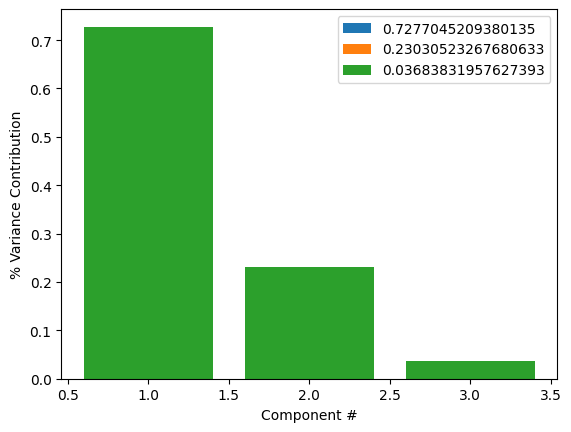

In [51]:
# Applying PCA and reducing the data to 2 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
for var in explained_var:
    print(var)
    plt.bar([1, 2, 3], explained_var, label=var)
    plt.xlabel("Component #")
    plt.ylabel("% Variance Contribution")
    plt.legend()
plt.show()

In [53]:
# dropping the third principal component
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# creating a dataframe of the principal components
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
print(principal_df.head().to_markdown())

|    |      PC1 |       PC2 |
|---:|---------:|----------:|
|  0 | -2.26454 |  0.505704 |
|  1 | -2.08643 | -0.655405 |
|  2 | -2.36795 | -0.318477 |
|  3 | -2.3042  | -0.575368 |
|  4 | -2.38878 |  0.674767 |
